In [1]:
%run -n boillerplate.ipynb

# Figure 3 : Decoding Bthetas (8 labels)

# Confusion matrix

In [2]:
try:
    all_cms = np.load('./data/fig_3_BT_cms.npy', allow_pickle = True)
    s_all_cms = np.load('./data/fig_3_BT_s_cms.npy', allow_pickle = True)
    all_p_mats = np.load('./data/fig_3_BT_pvals_cms.npy', allow_pickle = True)

except:
    
    all_cms = get_cm_kfold_bt(shuffled = False)
    s_all_cms = get_cm_kfold_bt(shuffled = True)
    all_p_mats = stats_cm_bt(all_cms, s_all_cms)
    
    np.save('./data/fig_3_BT_cms.npy', all_cms)
    np.save('./data/fig_3_BT_s_cms.npy', s_all_cms)
    np.save('./data/fig_3_BT_pvals_cms.npy', all_p_mats)

<ipython-input-3-fd646c86caba>:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(h_pad = 3., w_pad = 1.)


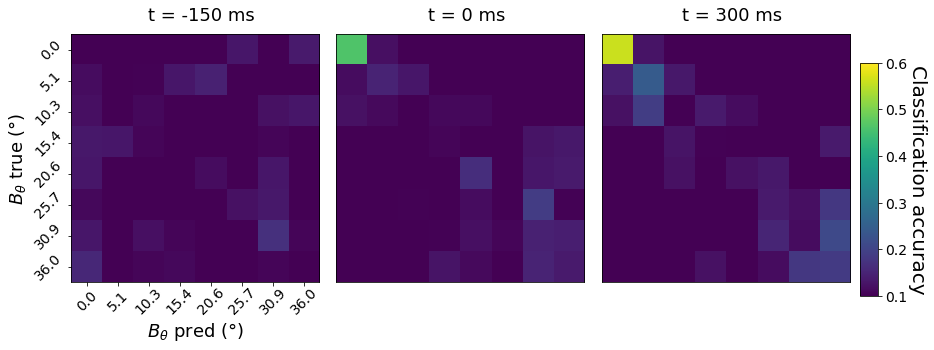

In [3]:
fig, axs = plt.subplots(figsize = (12, 12), nrows = 1, ncols = 3)

for i, ax in enumerate(fig.axes) :
    cm = np.sum(all_cms[i])/all_cms[i].shape[0]
    
    ims = ax.imshow(cm, vmin = 1/8, vmax = .55, aspect = 'equal')
    
    #pvals = all_p_mats[i]
    #pval_edges(pvals < .05, ax = ax)

    if i == 0 :
        ax.set_xlabel(r'$B_\theta$ pred (°)', fontsize = 18)
        ax.set_ylabel(r'$B_\theta$ true (°)', fontsize = 18)
        ax.tick_params(axis='x', which='major', pad=15)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.set_xticks(np.arange(0, 8))
        ax.set_yticks(np.arange(0, 8))
        ax.set_xticklabels(np.round(B_thetas[::-1]*180/np.pi,1), rotation = 45, va = 'center')
        ax.set_yticklabels(np.round(B_thetas[::-1]*180/np.pi,1), rotation = 45, va = 'center')
              
    else :
        ax.set_xticks([])
        ax.set_yticks([])
        
    if i == 2 :
        cax = fig.add_axes([ax.get_position().x1+0.1, # offset from the right of the axis
                                ax.get_position().y0+-.048, #bottom of the colorbar
                                0.02, #width of the colorbar
                                .27]) #height of the colorbar
        cb = fig.colorbar(ims, cax = cax, ticks = np.linspace(1/8, 0.55, 6))
        cb.ax.set_yticklabels(np.round(np.linspace(1/8, .55, 6), 1))
        cb.ax.tick_params(labelsize = 14)
        cax.set_ylabel('Classification accuracy', rotation = 270, labelpad = 20,
                      fontsize = 20)
    
    if i == 0 :
        ax.text(x = (cm.shape[0] /2)-.3, y = -1.1, s = 't = -150 ms', fontsize = 18,
               va = 'center', ha = 'center')
    elif i == 1 :
        ax.text(x = (cm.shape[0] /2)-.3, y = -1.1, s = 't = 0 ms', fontsize = 18,
               va = 'center', ha = 'center')
    elif i ==2 :
        ax.text(x = (cm.shape[0] /2)-.3, y = -1.1, s = 't = 300 ms', fontsize = 18,
               va = 'center', ha = 'center')
        
    ax.autoscale(False)
    ax.set_xlim(-.5, 7.5)
    ax.set_ylim(7.5, -.5)
    
fig.tight_layout(h_pad = 3., w_pad = 1.)

fig.savefig('./output/fig_3_BT_confmats.pdf', bbox_inches='tight', dpi=200, transparent=True)

plt.show()

In [4]:
for i, t in enumerate(cm_timesteps):
    p_mats = all_p_mats[i]
    signif = p_mats < .05
    n_diag = len(np.where(np.diag(signif) == True)[0])
    n_all = len(np.where(signif == True)[0])
    print('t = %.2fs, \t  signif diag = %s/%s' % (t,
                                          n_diag, 8))
print('\n')

t = -0.15s, 	  signif diag = 1/8
t = 0.00s, 	  signif diag = 2/8
t = 0.30s, 	  signif diag = 3/8




In [5]:
for i, t in enumerate(cm_timesteps):
    cm = np.sum(all_cms[i])/all_cms[i].shape[0]
    signif = cm > 1/8
    n_diag = len(np.where(np.diag(signif) == True)[0])
    n_all = len(np.where(signif == True)[0])
    print('t = %.2fs, \t %s / %s above chance level in diagonal (diag above chance level = %s/%s)' % (t,
                                         n_diag , n_all, n_diag, 8))
print('\n')

t = -0.15s, 	 4 / 30 above chance level in diagonal (diag above chance level = 4/8)
t = 0.00s, 	 6 / 28 above chance level in diagonal (diag above chance level = 6/8)
t = 0.30s, 	 7 / 25 above chance level in diagonal (diag above chance level = 7/8)




# Temporal evolution

In [6]:
    
try:
    accs = np.load('./data/fig_3_BT_all_accs.npy')

except:
    # Data
    data, labels, le = par_load_temporal_data(timesteps = timesteps, target_btheta = None,
                                            target_theta = None, data_type = 'bt_decoding',
                                            cluster_list = cluster_list)

    # Classifying
    logreg = LogisticRegression(**opts_LR)

    accs = []
    for ibin in tqdm(range(data.shape[0]), desc='Decoding') :
        xtrain, xtest, ytrain, ytest = train_test_split(data[ibin,:,:], labels, test_size=test_size, random_state = 42)
        logreg.fit(xtrain, ytrain)
        accs.append(metrics.balanced_accuracy_score(ytest, logreg.predict(xtest)))

    np.save('./data/fig_3_BT_all_accs.npy', accs)


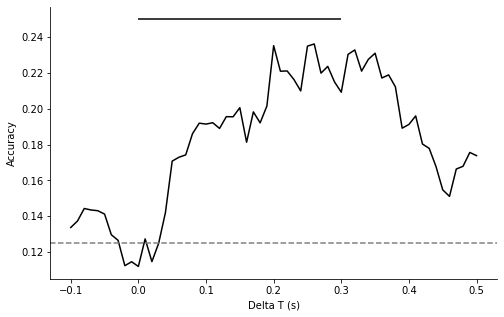

In [7]:
fig, ax = plt.subplots(figsize = (8,5))

plot_data = np.asarray(accs)
ax.plot(timesteps + win_size, plot_data, color = 'k')
    
ax.hlines(.25, 0., .3, color = 'k')
ax.axhline(1/8, c = 'gray', linestyle = '--')

ax.set_xlabel('Delta T (s)')
ax.set_ylabel('Accuracy')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# K-fold

In [8]:
try:

    kfold_scores = np.load('./data/fig_3_BT_all_kfold.npy')
    
except:
    
    # Classifying
    logreg = LogisticRegression(**opts_LR)

    kfold_scores = []
    for ibin in tqdm(range(data.shape[0]), desc='Decoding with K-fold') :
        scores = cross_val_score(logreg, data[ibin,:,:], labels, cv = 5, scoring = 'balanced_accuracy')
        kfold_scores.append(scores)

    np.save('./data/fig_3_BT_all_kfold.npy', kfold_scores)
    


In [9]:
timesteps[38]

0.18000000000000033

<ipython-input-10-992e65f7f5ba>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels((labs*100).astype(np.int16))


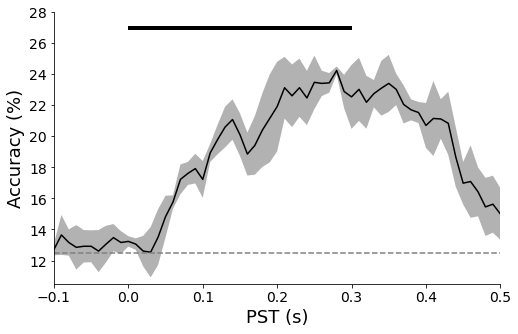

In [10]:
fig, ax = plt.subplots(figsize = (8,5))

kfold_means = np.asarray([x.mean() for x in kfold_scores])
kfold_stderr = np.asarray([x.std() for x in kfold_scores])

ax.plot(timesteps + win_size, kfold_means, color = 'k')
ax.fill_between(timesteps + win_size,
                kfold_means + kfold_stderr, kfold_means - kfold_stderr,
                facecolor = 'k', alpha = .3, edgecolor = None)
    

ax.hlines(.27, 0., .3, color = 'k', linewidth = 4)
ax.axhline(1/8, c = 'gray', linestyle = '--')

ax.set_xlabel('PST (s)', fontsize = 18)
ax.set_ylabel('Accuracy (%)', fontsize = 18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(timesteps[0]+win_size, timesteps[-1]+win_size)
ax.set_ylim(0.105, .28)

ax.tick_params(axis='both', which='major', labelsize=14)
labs = np.round(ax.get_yticks().tolist(),2)
ax.set_yticklabels((labs*100).astype(np.int16))

fig.savefig('./output/fig_3_BT_decoder_timecourse.pdf', bbox_inches='tight', dpi=200, transparent=True)

plt.show()

In [11]:
np.max(kfold_means)

0.2423611111111111

In [12]:
timesteps[np.argmax(kfold_means)]+win_size

0.28000000000000036

# Optim : Window size

In [13]:
try:
    max_acc = np.load('./data/sup_5_BT_opt_wsize.npy')

except:

    max_acc = []
    for win_size in win_sizes :
        data, labels, le = par_load_temporal_data(timesteps = timesteps, target_btheta = None,
                                            target_theta = None, data_type = 'bt_decoding',
                                            cluster_list = cluster_list)

        accs = []
        for ibin in range(data.shape[0]) :
            logreg = LogisticRegression(**opts_LR)
            xtrain, xtest, ytrain, ytest = train_test_split(data[ibin,:,:], labels, test_size=test_size, random_state = 42)
            logreg.fit(xtrain, ytrain)

            accs.append(metrics.balanced_accuracy_score(ytest, logreg.predict(xtest)))

        max_acc.append(np.max(accs))

    max_acc = np.array(max_acc)
    np.save('./data/sup_5_BT_opt_wsize.npy', max_acc)
    


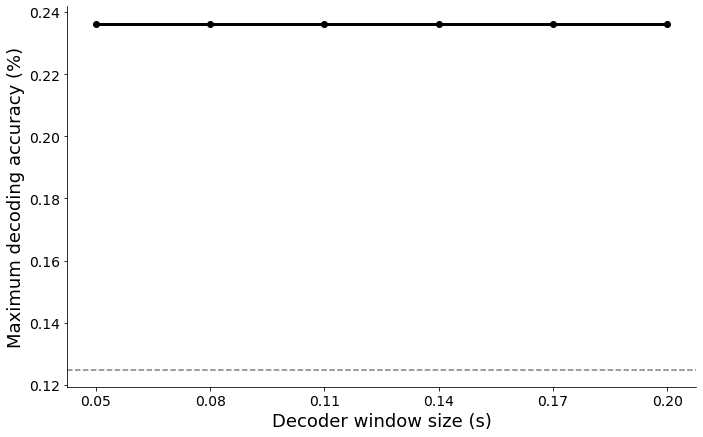

In [14]:
fig, ax = plt.subplots(figsize = (1.61 * 7, 7))

ax.plot(win_sizes, max_acc, c = 'k', linewidth = 3, marker = 'o')
ax.axhline(1/8, c = 'gray', linestyle = '--')
ax.set_xlabel('Decoder window size (s)', fontsize = 18)
ax.set_ylabel('Maximum decoding accuracy (%)', fontsize = 18)

ax.set_xticks(win_sizes)
#ax.set_yticks(np.linspace(np.min(max_acc), np.max(max_acc), 6))
#ax.set_yticklabels(np.round(np.linspace(np.min(max_acc), np.max(max_acc), 6) * 100,2))
ax.tick_params(axis='both', which='major', labelsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('./output/sup_5_BT_win_size.pdf', bbox_inches='tight', dpi=200, transparent=True)

plt.show()

# Optim : Penalty (L1,L2,mix(elasticnet))

In [15]:
try:
    max_acc = np.load('./data/sup_5_BT_opt_penalty.npy')
except:    
    data, labels, le = par_load_temporal_data(timesteps = timesteps, target_btheta = None,
                                            target_theta = None, data_type = 'bt_decoding',
                                            cluster_list = cluster_list)

    max_acc = []
    for penalty in ['l1', 'l2', 'elasticnet']:

        accs = []
        for ibin in tqdm(range(data.shape[0])) :
            logreg = LogisticRegression(solver = 'lbfgs' if penalty == 'l2' else 'saga', 
                                        l1_ratio = .5 if penalty == 'elasticnet' else None,
                                       **opts_LR)
            xtrain, xtest, ytrain, ytest = train_test_split(data[ibin,:,:], labels, test_size=test_size, random_state = 42)
            logreg.fit(xtrain, ytrain)

            accs.append(metrics.balanced_accuracy_score(ytest, logreg.predict(xtest)))

        max_acc.append(np.max(accs))

    max_acc = np.array(max_acc)        
    np.save('./data/sup_5_BT_opt_penalty.npy', max_acc)
    


In [16]:
print('L1 acc %s'%max_acc[0])
print('L2 acc %s'%max_acc[1])
print('L1/L2 acc %s'%max_acc[2])

L1 acc 0.2338283132849688
L2 acc 0.23625224480896184
L1/L2 acc 0.2338283132849688


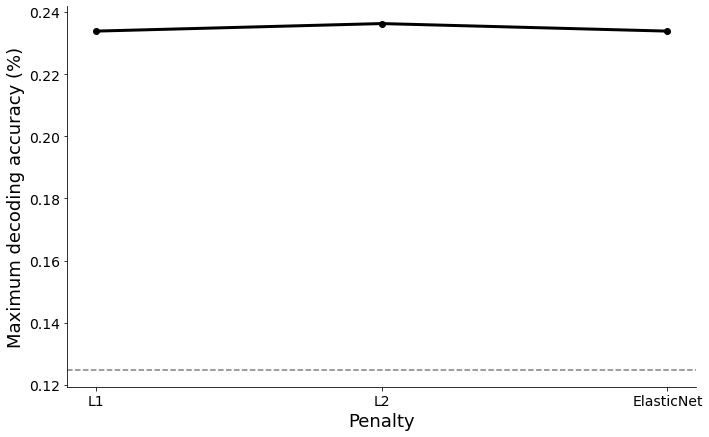

In [17]:
fig, ax = plt.subplots(figsize = (1.61 * 7, 7))

ax.plot(np.arange(0, 3, 1), max_acc, c = 'k', linewidth = 3, marker = 'o')
ax.axhline(1/8, c = 'gray', linestyle = '--')
ax.set_xlabel('Penalty', fontsize = 18)
ax.set_ylabel('Maximum decoding accuracy (%)', fontsize = 18)

ax.set_xticks(np.arange(0, 3, 1))
ax.set_xticklabels(['L1', 'L2', 'ElasticNet'])

#ax.set_yticks(np.linspace(np.min(max_acc), np.max(max_acc), 6))
#ax.set_yticklabels(np.round(np.linspace(np.min(max_acc), np.max(max_acc), 6) * 100,2))

ax.tick_params(axis='both', which='major', labelsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('./output/sup_5_BT_penalty.pdf', bbox_inches='tight', dpi=200, transparent=True)

plt.show()

# Optim : C = 1/$\lambda$ (.01 to 10)

In [18]:

try:
    max_acc = np.load('./data/sup_5_BT_opt_C.npy')
    
except:    
    data, labels, le = par_load_temporal_data(timesteps = timesteps, target_btheta = None,
                                            target_theta = None, data_type = 'bt_decoding',
                                            cluster_list = cluster_list)
    max_acc = []
    for C_ in Cs:
        opts_LR_ = opts_LR.copy()
        opts_LR_.update(C = C_)
        accs = []
        for ibin in range(data.shape[0]) :
            logreg = LogisticRegression(**opts_LR_)
            xtrain, xtest, ytrain, ytest = train_test_split(data[ibin,:,:], labels, test_size=test_size, random_state = 42)
            logreg.fit(xtrain, ytrain)

            accs.append(metrics.balanced_accuracy_score(ytest, logreg.predict(xtest)))

        max_acc.append(np.max(accs))

    max_acc = np.array(max_acc)
    np.save('./data/sup_5_BT_opt_C.npy', max_acc)
    


Loading data: 100%|██████████| 61/61 [04:19<00:00,  4.26s/it]


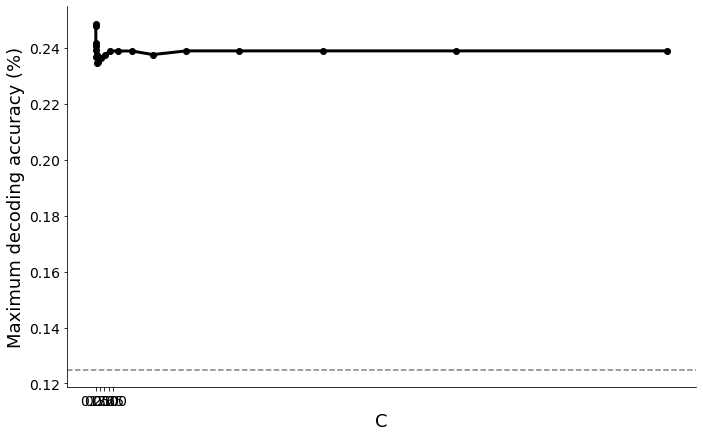

In [19]:
fig, ax = plt.subplots(figsize = (1.61 * 7, 7))

ax.plot(Cs, max_acc, c = 'k', linewidth = 3, marker = 'o')
ax.axhline(1/8, c = 'gray', linestyle = '--')
ax.set_xlabel('C', fontsize = 18)
ax.set_ylabel('Maximum decoding accuracy (%)', fontsize = 18)

ax.set_xticks(np.round(np.linspace(.01, 3, 5),2))

'''ax.set_yticks(np.linspace(np.min(max_acc), np.max(max_acc), 6))
ax.set_yticklabels(np.round(np.linspace(np.min(max_acc), np.max(max_acc), 6) * 100,2))'''

ax.tick_params(axis='both', which='major', labelsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('./output/sup_5_BT_C.pdf', bbox_inches='tight', dpi=200, transparent=True)

plt.show()

# Optim : Train/test size (.15, .5)

In [20]:
try:
    max_acc = np.load('./data/sup_5_BT_opt_size.npy')
    
except:

    data, labels, le = par_load_temporal_data(timesteps = timesteps, target_btheta = None,
                                            target_theta = None, data_type = 'bt_decoding',
                                            cluster_list = cluster_list)

    max_acc = []
    for test_size_ in test_sizes:

        accs = []
        for ibin in range(data.shape[0]) :
            logreg = LogisticRegression(**opts_LR)
            xtrain, xtest, ytrain, ytest = train_test_split(data[ibin,:,:], labels, 
                                                            test_size=test_size_, random_state = 42)
            logreg.fit(xtrain, ytrain)

            accs.append(metrics.balanced_accuracy_score(ytest, logreg.predict(xtest)))

        max_acc.append(np.max(accs))

    max_acc = np.array(max_acc)
    np.save('./data/sup_5_BT_opt_size.npy', max_acc)
    


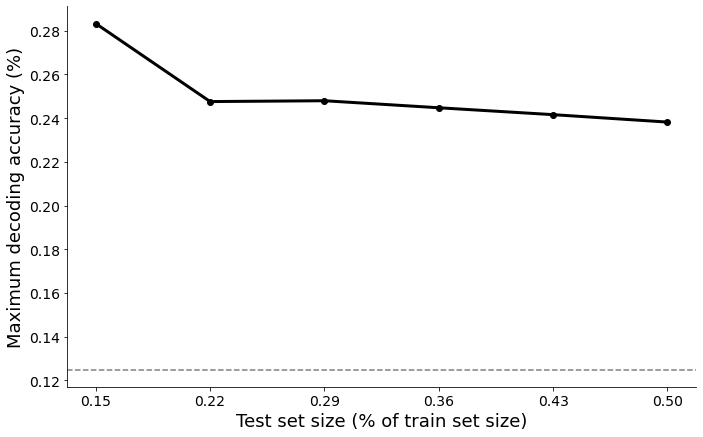

In [21]:
fig, ax = plt.subplots(figsize = (1.61 * 7, 7))

ax.plot(test_sizes, max_acc, c = 'k', linewidth = 3, marker = 'o')
ax.axhline(1/8, c = 'gray', linestyle = '--')
ax.set_xlabel('Test set size (% of train set size)', fontsize = 18)
ax.set_ylabel('Maximum decoding accuracy (%)', fontsize = 18)

ax.set_xticks(np.round(np.linspace(.15, .5, 6),2))

'''ax.set_yticks(np.linspace(np.min(max_acc), np.max(max_acc), 6))
ax.set_yticklabels(np.round(np.linspace(np.min(max_acc), np.max(max_acc), 6) * 100,2))'''

ax.tick_params(axis='both', which='major', labelsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('./output/sup_5_BT_size.pdf', bbox_inches='tight', dpi=200, transparent=True)

plt.show()